# PROYECT SETUP

In [393]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV

# LOADING AND EXPLORING DATA

In [265]:
df = pd.read_csv(r".\WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [267]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [269]:
print("Dataframe shape:", df.shape)

Dataframe shape: (7043, 21)


In [271]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# DATA PREPROCESSING

In [274]:
# Is there any missing values?
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [276]:
# Is there any duplicated rows?
df.duplicated().sum()

0

In [278]:
# Changing TotalCharges datatype
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
print(df["TotalCharges"].dtype)

float64


In [280]:
# Is there any missing values?
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [282]:
df = df.dropna()

In [284]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# EXPLORATORY ANALYSIS

In [287]:
# Summary
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


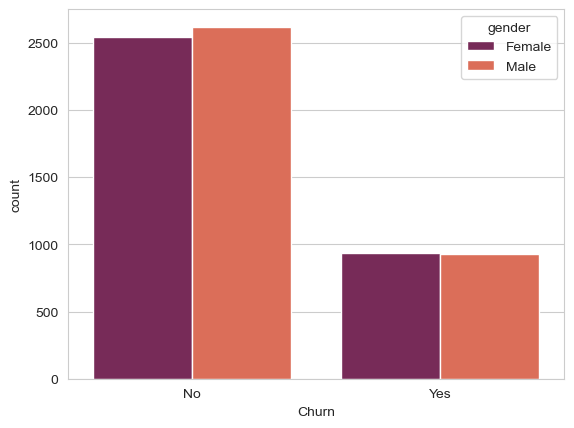

In [289]:
# Visualization of the target variable "Churn"
sns.countplot(data=df, x="Churn", palette="rocket", hue="gender")
plt.show()

In [291]:
df["Churn"].value_counts()

Churn
No     5163
Yes    1869
Name: count, dtype: int64

In [293]:
print("Churn Rate:", df["Churn"].value_counts()["Yes"] / df.shape[0] * 100)

Churn Rate: 26.578498293515356


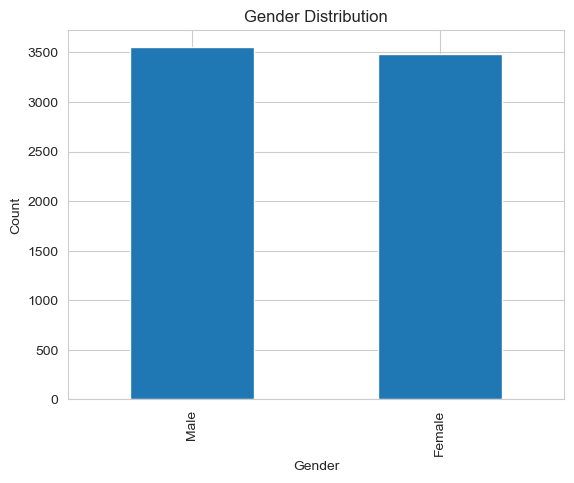

In [295]:
# Visualization of gender
df["gender"].value_counts().plot(kind="bar")
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

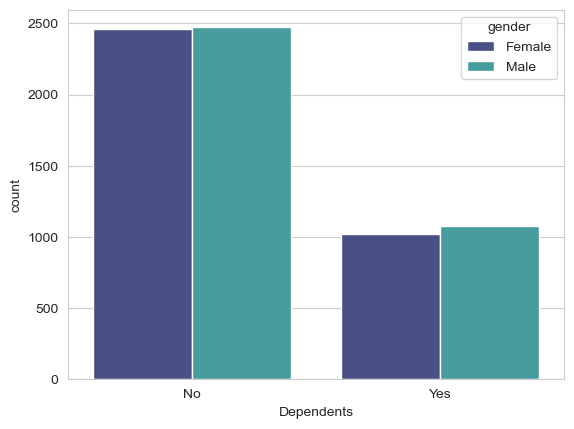

In [297]:
# Visualization of dependents 
sns.countplot(data=df, x="Dependents", palette="mako", hue="gender")
plt.show()

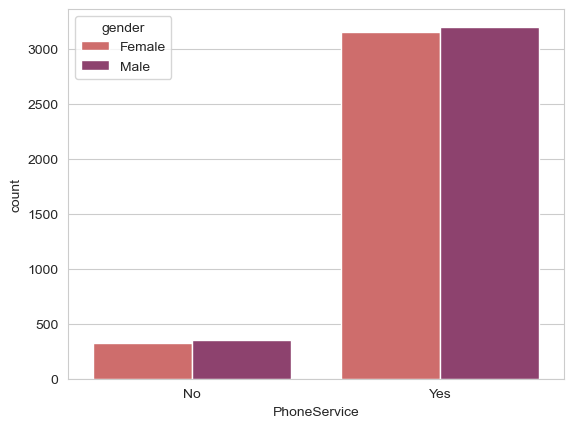

In [299]:
# Visualization of Phone Services 
sns.countplot(data=df, x="PhoneService", palette="flare", hue="gender")
plt.show()

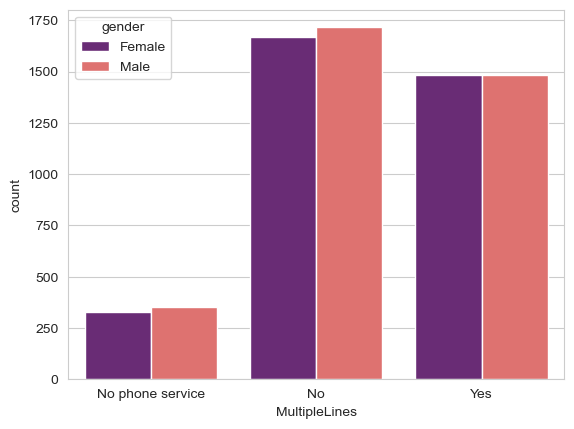

In [301]:
# Visualization of Multiple Lines
sns.countplot(data=df, x="MultipleLines", palette="magma", hue="gender")
plt.show()

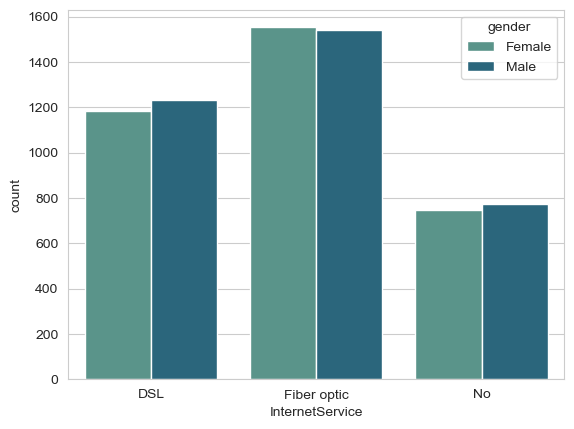

In [303]:
# Visualization of Internet Services 
sns.countplot(data=df, x="InternetService", palette="crest", hue="gender")
plt.show()

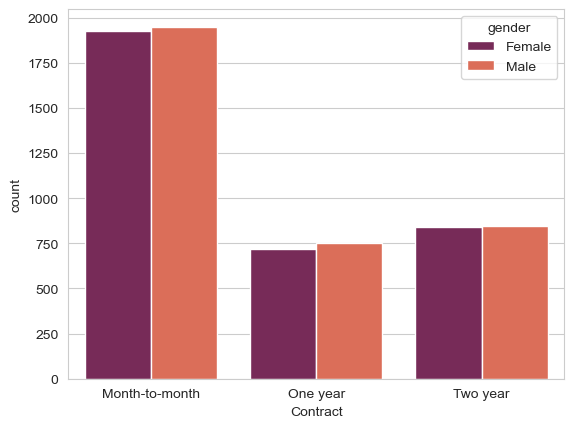

In [305]:
# Visualization of Contracts 
sns.countplot(data=df, x="Contract", palette="rocket", hue="gender")
plt.show()

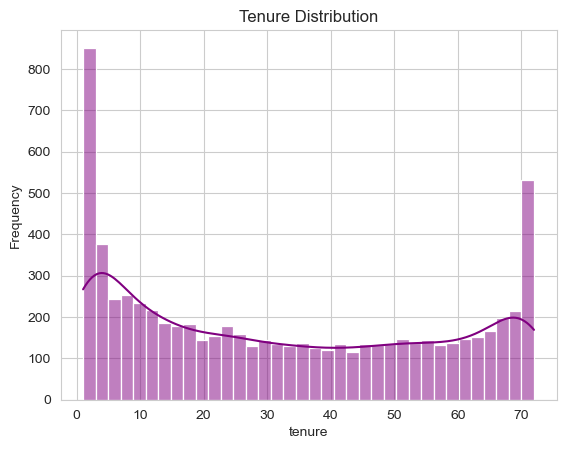

In [307]:
# Visualization of Tenure
sns.histplot(x=df["tenure"], color="purple", bins=36, kde=True)
plt.title("Tenure Distribution")
plt.ylabel("Frequency")
plt.show()

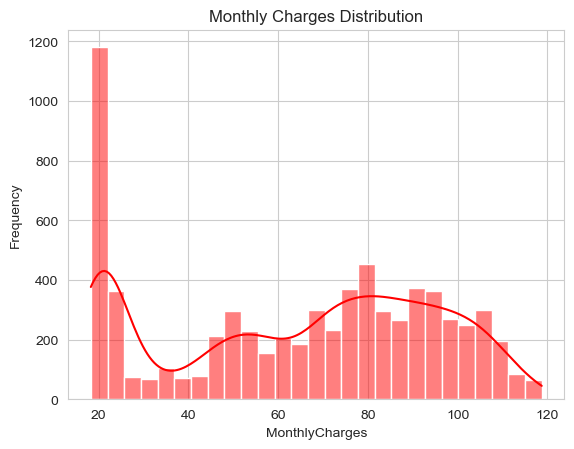

In [309]:
# Visualization of Monthly Charges 
sns.histplot(x=df["MonthlyCharges"], color="red", bins=27, kde=True)
plt.title("Monthly Charges Distribution")
plt.ylabel("Frequency")
plt.show()

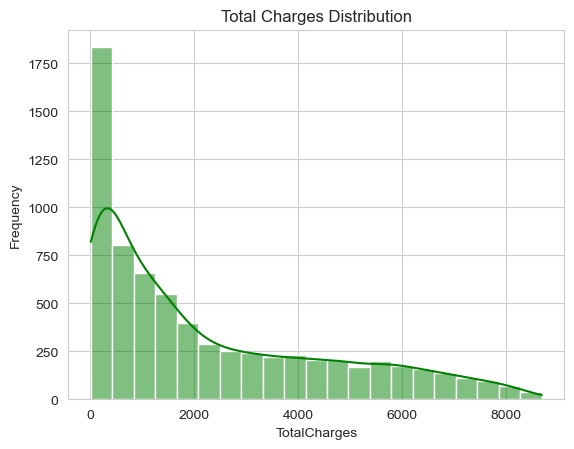

In [311]:
# Visualization of Total Charges 
sns.histplot(x=df["TotalCharges"], color="green", bins=21, kde=True)
plt.title("Total Charges Distribution")
plt.ylabel("Frequency")
plt.show()

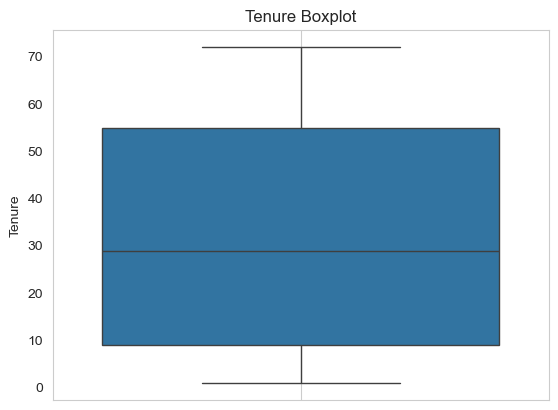

In [313]:
# Boxplots
sns.boxplot(data=df, y="tenure")
plt.title("Tenure Boxplot")
plt.ylabel("Tenure")
plt.grid()
plt.show()

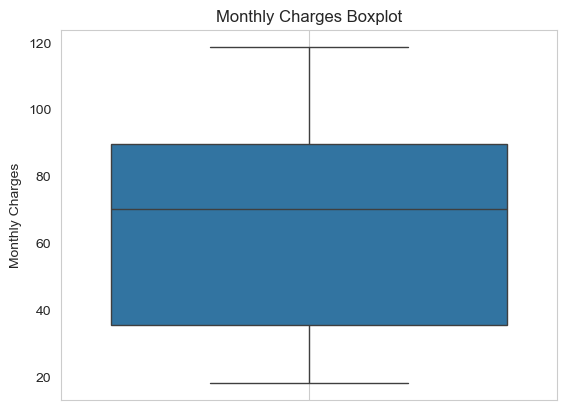

In [315]:
sns.boxplot(data=df, y="MonthlyCharges")
plt.title("Monthly Charges Boxplot")
plt.ylabel("Monthly Charges")
plt.grid()
plt.show()

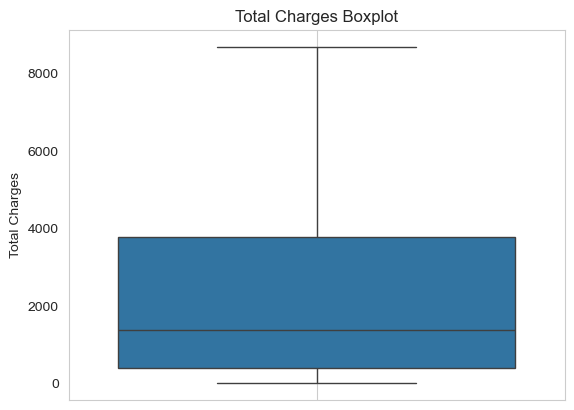

In [317]:
sns.boxplot(data=df, y="TotalCharges")
plt.title("Total Charges Boxplot")
plt.ylabel("Total Charges")
plt.grid()
plt.show()

In [319]:
# Correlation Matrix
corr_matrix = df[["tenure", "MonthlyCharges", "TotalCharges"]].corr()

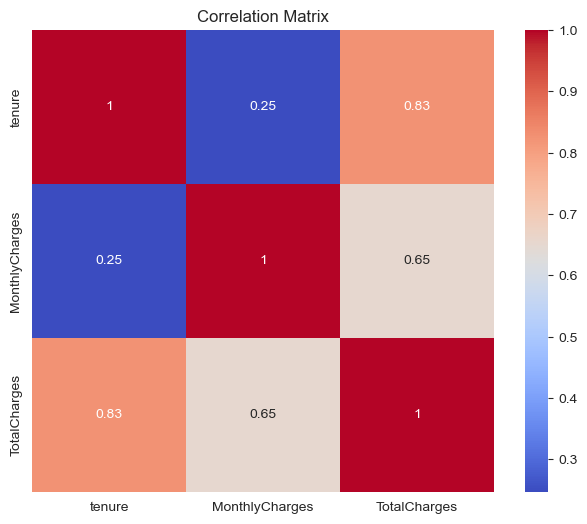

In [321]:
# Visualization
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", square=True)
plt.title("Correlation Matrix")
plt.show()

# MACHINE LEARNING MODELS

In [324]:
# Drop CustomerID
df = df.drop("customerID", axis=1)

In [326]:
# Preparing data
X = df.drop("Churn", axis=1)
y = df["Churn"]

In [328]:
# Changing categorical values to numeric
X_Categorical = X.select_dtypes(include=["object"])
le = LabelEncoder()
X_le = X_Categorical.apply(le.fit_transform)

In [330]:
X_le.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2
1,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3
2,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3
3,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0
4,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2


In [332]:
# Standardize Tenure and Charges
scaler = StandardScaler()
df["tenure"] = scaler.fit_transform(df[["tenure"]])
df["MonthlyCharges"] = scaler.fit_transform(df[["MonthlyCharges"]])
df["TotalCharges"] = scaler.fit_transform(df[["TotalCharges"]])

In [334]:
X = pd.concat([X_le, df["tenure"], df["MonthlyCharges"], df["TotalCharges"]], axis=1)
X.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,tenure,MonthlyCharges,TotalCharges
0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,-1.280248,-1.161694,-0.994194
1,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0.064303,-0.260878,-0.173740
2,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,-1.239504,-0.363923,-0.959649
3,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0.512486,-0.747850,-0.195248
4,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,-1.239504,0.196178,-0.940457


### Splitting data into training and testing


In [337]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Models 

In [342]:
# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)

In [348]:
# Evaluation
print("Accuracy:", accuracy_score(y_test, lr_preds))
print("Classification Report:\n", classification_report(y_test, lr_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, lr_preds))

Accuracy: 0.7882018479033405
Classification Report:
               precision    recall  f1-score   support

          No       0.83      0.89      0.86      1033
         Yes       0.62      0.51      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407

Confusion Matrix:
 [[918 115]
 [183 191]]


In [352]:
# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

In [354]:
# Evaluation
print("Accuracy:", accuracy_score(y_test, rf_preds))
print("Classification Report:\n", classification_report(y_test, rf_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_preds))

Accuracy: 0.7810945273631841
Classification Report:
               precision    recall  f1-score   support

          No       0.82      0.90      0.86      1033
         Yes       0.62      0.45      0.52       374

    accuracy                           0.78      1407
   macro avg       0.72      0.68      0.69      1407
weighted avg       0.77      0.78      0.77      1407

Confusion Matrix:
 [[931 102]
 [206 168]]


In [356]:
# Support Vector Machines
svm_model = SVC(kernel="rbf", C=1, random_state=42)
svm_model.fit(X_train, y_train)
svm_preds = svm_model.predict(X_test)

In [358]:
# Evaluation
print("Accuracy:", accuracy_score(y_test, svm_preds))
print("Classification Report:\n", classification_report(y_test, svm_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, svm_preds))

Accuracy: 0.7917555081734187
Classification Report:
               precision    recall  f1-score   support

          No       0.82      0.91      0.87      1033
         Yes       0.65      0.46      0.54       374

    accuracy                           0.79      1407
   macro avg       0.74      0.69      0.70      1407
weighted avg       0.78      0.79      0.78      1407

Confusion Matrix:
 [[942  91]
 [202 172]]


### Oversampling with SMOTE

In [371]:
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

In [379]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

In [381]:
# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)

In [383]:
# Evaluation
print("Accuracy:", accuracy_score(y_test, lr_preds))
print("Classification Report:\n", classification_report(y_test, lr_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, lr_preds))

Accuracy: 0.7918683446272992
Classification Report:
               precision    recall  f1-score   support

          No       0.83      0.74      0.78      1037
         Yes       0.76      0.85      0.80      1029

    accuracy                           0.79      2066
   macro avg       0.80      0.79      0.79      2066
weighted avg       0.80      0.79      0.79      2066

Confusion Matrix:
 [[765 272]
 [158 871]]


In [385]:
# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

In [387]:
# Evaluation
print("Accuracy:", accuracy_score(y_test, rf_preds))
print("Classification Report:\n", classification_report(y_test, rf_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_preds))

Accuracy: 0.8330106485963213
Classification Report:
               precision    recall  f1-score   support

          No       0.85      0.81      0.83      1037
         Yes       0.82      0.86      0.84      1029

    accuracy                           0.83      2066
   macro avg       0.83      0.83      0.83      2066
weighted avg       0.83      0.83      0.83      2066

Confusion Matrix:
 [[838 199]
 [146 883]]


In [389]:
# Support Vector Machines
svm_model = SVC(kernel="rbf", C=1, random_state=42)
svm_model.fit(X_train, y_train)
svm_preds = svm_model.predict(X_test)

In [391]:
# Evaluation
print("Accuracy:", accuracy_score(y_test, svm_preds))
print("Classification Report:\n", classification_report(y_test, svm_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, svm_preds))

Accuracy: 0.8034849951597289
Classification Report:
               precision    recall  f1-score   support

          No       0.83      0.77      0.80      1037
         Yes       0.78      0.84      0.81      1029

    accuracy                           0.80      2066
   macro avg       0.81      0.80      0.80      2066
weighted avg       0.81      0.80      0.80      2066

Confusion Matrix:
 [[794 243]
 [163 866]]


### GridSearch for Random Forest

In [397]:
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 5, 10],
    "min_samples_split": [2, 5, 10]
}

grid_search = GridSearchCV(rf_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best Hiperparameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Best Hiperparameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Best Accuracy: 0.8295399515738499


This accuracy is lower than the one that i get from rf_model

### Best Model: Random Forest without parameter tuning
RandomForestClassifier(n_estimators=100, random_state=42)

Best Accuracy: 0.8330106485963213